In [1]:
from raster_dataset import RasterDataset
import vegetation_indices
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = './sample_data/sample_sentinel2_data.tif'

# Load the dataset
dataset = RasterDataset.from_geotiff(file)

# Calculate NDVI and EVI
# red_band = dataset.get_band_data(band_name='B04')
# nir_band = dataset.get_band_data(band_name='B08')
# blue_band = dataset.get_band_data(band_name='B02')
# ndvi = vegetation_indices.calculate_ndvi(red_band, nir_band)
# evi = vegetation_indices.calculate_evi(blue_band, red_band, nir_band)
# # Stack NDVI and EVI (band must be the first dimension)
# vegetation_indices = np.stack([ndvi, evi], axis=0)
vegetation_indices_fns = [vegetation_indices.calculate_ndvi, vegetation_indices.calculate_evi]
vegetation_indices = vegetation_indices.apply_vi_fns(dataset, vegetation_indices_fns)

In [4]:
# Create a new RasterDataset object with the vegetation indices
vegetation_indices_ds = RasterDataset(
    data=vegetation_indices,
    crs=dataset.crs,
    transform=dataset.transform,
    band_names=['NDVI', 'EVI'],
    nodata=dataset.nodata
)

#Export the new RasterDataset object to a GeoTIFF file
vegetation_indices_ds.to_geotiff('./vegetation_indices.tif')

CRS: EPSG:32615
transform: | 10.00, 0.00, 603000.00|
| 0.00,-10.00, 3497040.00|
| 0.00, 0.00, 1.00|
nodata: None


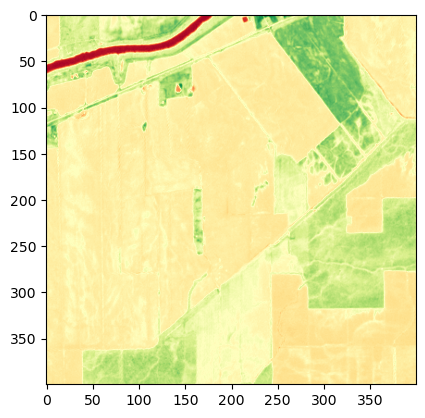

In [7]:
# Open Vegetation Indices GeoTIFF
vegetation_indices_ds = RasterDataset.from_geotiff('./vegetation_indices.tif')

# Print metatada
print(f'CRS:', vegetation_indices_ds.crs)
print(f'transform:', vegetation_indices_ds.transform)
print(f'nodata:', vegetation_indices_ds.nodata)

# Plot NDVI
ndvi_band = vegetation_indices_ds.get_band_data(band_name='NDVI')
plt.imshow(ndvi_band, cmap='RdYlGn')